In [1]:
# code written by Abhishek Sule @ Chatham University, M.S. Biology for use with Single Cell Portal by Broad Institute

import pandas as pd
import anndata
import os
import scanpy as sc

# Load the data
print("Loading data...")
adata = anndata.read_h5ad("all_cells.h5ad")
arrays = list(adata.obs.index)  # the names of the arrays
genes = list(adata.var.index)  # names of all genes in the dataset

# Create the DataFrame
print("Creating DataFrame...")
df = pd.DataFrame(adata.X)
df.index = arrays
df.columns = genes

# Check unique values in GZMB column
print("Unique values in GZMB column:", df['GZMB'].unique())

# Check data type of GZMB column
print("Data type of GZMB column:", df['GZMB'].dtype)

# Print a sample of the DataFrame
print("Sample of the DataFrame:", df.head())

# Adjust filtering logic for near-zero values
print("Filtering data...")
non_gzmb_cells = df[df['GZMB'] <= 1e-6].index.tolist()
gzmb_cells = df[df['GZMB'] > 1e-6].index.tolist()

# Create DataFrames for the non-GZMB and GZMB cells
non_gzmb_df = df.loc[non_gzmb_cells]
gzmb_df = df.loc[gzmb_cells]

# Extract gene names
non_gzmb_genes = non_gzmb_df.columns.tolist()
gzmb_genes = gzmb_df.columns.tolist()

# Specify a different directory for saving the files
output_dir = "output_files"
os.makedirs(output_dir, exist_ok=True)

# Save the entire filtered DataFrames to separate CSV files
print("Saving filtered DataFrames...")
non_gzmb_df.to_csv(os.path.join(output_dir, "non_gzmb_cells_genes_complete.csv"), index=False)
gzmb_df.to_csv(os.path.join(output_dir, "gzmb_cells_genes_complete.csv"), index=False)

# Save the gene names as complete files
print("Saving gene names as complete files...")
pd.DataFrame(non_gzmb_genes, columns=["Gene"]).to_csv(os.path.join(output_dir, "non_gzmb_genes_complete.csv"), index=False)
pd.DataFrame(gzmb_genes, columns=["Gene"]).to_csv(os.path.join(output_dir, "gzmb_genes_complete.csv"), index=False)

print("Gene names for cells that do and do not produce granzyme B have been saved as complete files.")

# Recreate granzyme expression compared to cell types
granzyme_genes = ['GZMA', 'GZMB']
granzyme_genes = [gene for gene in granzyme_genes if gene in adata.var_names]
adata.obs['total_granzyme'] = adata[:, granzyme_genes].X.sum(axis=1)
sc.pl.umap(adata, color=['General Celltypes', 'total_granzyme'])

# Produce a table of cell types vs granzyme expressions
celltype_granzyme_table = adata.obs.groupby('General Celltypes')['total_granzyme'].mean().reset_index()
celltype_granzyme_table.columns = ['Cell Type', 'Average Granzyme Expression']
print(celltype_granzyme_table)

# Save the table to a CSV file
celltype_granzyme_table.to_csv(os.path.join(output_dir, "celltype_vs_granzyme_expression.csv"), index=False)
print("Table of cell types vs granzyme expressions has been saved.")


ModuleNotFoundError: No module named 'scanpy'

In [2]:
import scanpy as sc

ModuleNotFoundError: No module named 'scanpy'

In [3]:
pip install scanpy

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   --- ------------------------------------ 0.2/2.1 MB 5.3 MB/s eta 0:00:01
   --------------------- ------------------ 1.1/2.1 MB 17.7 MB/s eta 0:00:01
   ---------------------------------------  2.1/2.1 MB 22.0 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 16.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/56.9 kB ? eta -:--:--
   ---------------------------------------- 56.9/56.9 kB ? eta 0:00:00
   ---------------------------------------- 0.0/85.7 kB ? eta -:--:--
   ---------------------------------------- 85.7/85.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/79.8 kB ? eta -:--:--
   ---------------------------------------- 79.8/79.8 kB ? eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8072 sha256=a95

In [4]:
!pip install scanpy

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---- ----------------------------------- 0.2/2.1 MB 6.9 MB/s eta 0:00:01
   ----------------------------- ---------- 1.5/2.1 MB 19.6 MB/s eta 0:00:01
   ---------------------------------------- 2.1/2.1 MB 18.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/56.9 kB ? eta -:--:--
   ---------------------------------------- 56.9/56.9 kB 2.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/85.7 kB ? eta -:--:--
   ---------------------------------------- 85.7/85.7 kB 5.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/83.6 kB ? eta -:--:--
   ---------------------------------------- 83.6/83.6 kB 4.6 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8072 sha256=9b820bb4d443393171f06fbbef15b0ca40fa16456f211775132602f4c34

Loading data...
Creating DataFrame...
Unique values in GZMB column: [-0.4437231  -0.6130368  -0.6747464  ... -0.16763632  2.6062613
  0.9008085 ]
Data type of GZMB column: float32
Sample of the DataFrame:                               AADAT     ABCA1     ABCA3     ABCA6     ABCA8  \
Array2_28918_CAACGACACATC -0.167468  0.638589  1.007928 -0.227317 -0.065573   
Array2_28918_CAGTATGAGATC -0.167468  0.790691 -0.415276  0.098851 -0.065573   
Array2_28918_ACGTCGTCCCTT -0.167468  1.923116  0.261594 -0.227317 -0.065573   
Array2_28918_GCCAGCACATTA -0.167468  0.903512  0.122951  3.366497 -0.065573   
Array2_28918_CGAGTCTGTTAG -0.167468  1.757663  0.396551 -0.227317 -0.065573   

                              ABCB1    ABCB11     ABCC4     ABCC8     ABCC9  \
Array2_28918_CAACGACACATC -0.193275 -0.080952  0.713645 -0.059069 -0.061314   
Array2_28918_CAGTATGAGATC -0.193275 -0.080952  0.661741 -0.059069 -0.061314   
Array2_28918_ACGTCGTCCCTT  0.226489 -0.080952 -0.483003 -0.059069 -0.061314   
Arra

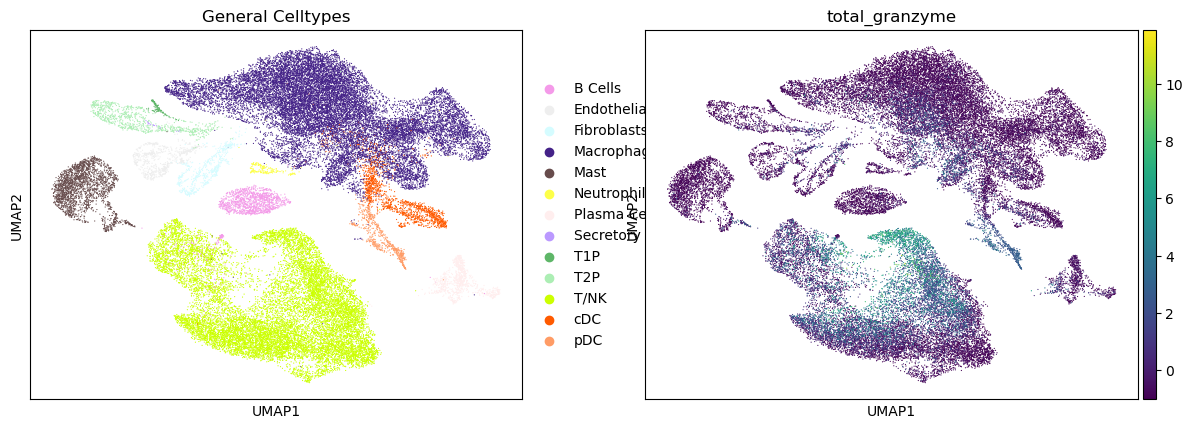

                Cell Type  Average Granzyme Expression
0                 B Cells                    -0.734610
1             Endothelial                    -0.533357
2             Fibroblasts                    -0.298991
3   Macrophages/Monocytes                    -0.627294
4                    Mast                    -0.862978
5             Neutrophils                    -0.791114
6            Plasma Cells                    -0.500125
7    Secretory Epithelial                    -0.769893
8                     T1P                    -0.806709
9                     T2P                    -0.533926
10                   T/NK                     1.084311
11                    cDC                    -0.722484
12                    pDC                     1.700462
Table of cell types vs granzyme expressions has been saved.


C:\Users\abhic\AppData\Local\Temp\ipykernel_18840\735820043.py:65: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  celltype_granzyme_table = adata.obs.groupby('General Celltypes')['total_granzyme'].mean().reset_index()


In [6]:
# code written by Abhishek Sule @ Chatham University, M.S. Biology for use with Single Cell Portal by Broad Institute

import pandas as pd
import anndata
import os
import scanpy as sc

# Load the data
print("Loading data...")
adata = anndata.read_h5ad("all_cells.h5ad")
arrays = list(adata.obs.index)  # the names of the arrays
genes = list(adata.var.index)  # names of all genes in the dataset

# Create the DataFrame
print("Creating DataFrame...")
df = pd.DataFrame(adata.X)
df.index = arrays
df.columns = genes

# Check unique values in GZMB column
print("Unique values in GZMB column:", df['GZMB'].unique())

# Check data type of GZMB column
print("Data type of GZMB column:", df['GZMB'].dtype)

# Print a sample of the DataFrame
print("Sample of the DataFrame:", df.head())

# Adjust filtering logic for near-zero values
print("Filtering data...")
non_gzmb_cells = df[df['GZMB'] <= 1e-6].index.tolist()
gzmb_cells = df[df['GZMB'] > 1e-6].index.tolist()

# Create DataFrames for the non-GZMB and GZMB cells
non_gzmb_df = df.loc[non_gzmb_cells]
gzmb_df = df.loc[gzmb_cells]

# Extract gene names
non_gzmb_genes = non_gzmb_df.columns.tolist()
gzmb_genes = gzmb_df.columns.tolist()

# Specify a different directory for saving the files
output_dir = "output_files"
os.makedirs(output_dir, exist_ok=True)

# Save the entire filtered DataFrames to separate CSV files
print("Saving filtered DataFrames...")
non_gzmb_df.to_csv(os.path.join(output_dir, "non_gzmb_cells_genes_complete.csv"), index=False)
gzmb_df.to_csv(os.path.join(output_dir, "gzmb_cells_genes_complete.csv"), index=False)

# Save the gene names as complete files
print("Saving gene names as complete files...")
pd.DataFrame(non_gzmb_genes, columns=["Gene"]).to_csv(os.path.join(output_dir, "non_gzmb_genes_complete.csv"), index=False)
pd.DataFrame(gzmb_genes, columns=["Gene"]).to_csv(os.path.join(output_dir, "gzmb_genes_complete.csv"), index=False)

print("Gene names for cells that do and do not produce granzyme B have been saved as complete files.")

# Recreate granzyme expression compared to cell types
granzyme_genes = ['GZMA', 'GZMB']
granzyme_genes = [gene for gene in granzyme_genes if gene in adata.var_names]
adata.obs['total_granzyme'] = adata[:, granzyme_genes].X.sum(axis=1)
sc.pl.umap(adata, color=['General Celltypes', 'total_granzyme'])

# Produce a table of cell types vs granzyme expressions
celltype_granzyme_table = adata.obs.groupby('General Celltypes')['total_granzyme'].mean().reset_index()
celltype_granzyme_table.columns = ['Cell Type', 'Average Granzyme Expression']
print(celltype_granzyme_table)

# Save the table to a CSV file
celltype_granzyme_table.to_csv(os.path.join(output_dir, "celltype_vs_granzyme_expression.csv"), index=False)
print("Table of cell types vs granzyme expressions has been saved.")


In [10]:
!pip install matplotlib

In [12]:
import pandas as pd
import anndata
import os
import scanpy as sc
import matplotlib.pyplot as plt

# Load the data
print("Loading data...")
adata = anndata.read_h5ad("all_cells.h5ad")
arrays = list(adata.obs.index)  # the names of the arrays
genes = list(adata.var.index)  # names of all genes in the dataset

# Create the DataFrame
print("Creating DataFrame...")
df = pd.DataFrame(adata.X)
df.index = arrays
df.columns = genes

# Check unique values in GZMB column
print("Unique values in GZMB column:", df['GZMB'].unique())

# Check data type of GZMB column
print("Data type of GZMB column:", df['GZMB'].dtype)

# Print a sample of the DataFrame
print("Sample of the DataFrame:", df.head())

# Adjust filtering logic for near-zero values
print("Filtering data...")
non_gzmb_cells = df[df['GZMB'] <= 1e-6].index.tolist()
gzmb_cells = df[df['GZMB'] > 1e-6].index.tolist()

# Create DataFrames for the non-GZMB and GZMB cells
non_gzmb_df = df.loc[non_gzmb_cells]
gzmb_df = df.loc[gzmb_cells]

# Extract gene names
non_gzmb_genes = non_gzmb_df.columns.tolist()
gzmb_genes = gzmb_df.columns.tolist()

# Specify a different directory for saving the files
output_dir = "output_files"
os.makedirs(output_dir, exist_ok=True)

# Save the entire filtered DataFrames to separate CSV files
print("Saving filtered DataFrames...")
non_gzmb_df.to_csv(os.path.join(output_dir, "non_gzmb_cells_genes_complete.csv"), index=False)
gzmb_df.to_csv(os.path.join(output_dir, "gzmb_cells_genes_complete.csv"), index=False)

# Save the gene names as complete files
print("Saving gene names as complete files...")
pd.DataFrame(non_gzmb_genes, columns=["Gene"]).to_csv(os.path.join(output_dir, "non_gzmb_genes_complete.csv"), index=False)
pd.DataFrame(gzmb_genes, columns=["Gene"]).to_csv(os.path.join(output_dir, "gzmb_genes_complete.csv"), index=False)

print("Gene names for cells that do and do not produce granzyme B have been saved as complete files.")

# Recreate granzyme expression compared to cell types
granzyme_genes = ['GZMA', 'GZMB']
granzyme_genes = [gene for gene in granzyme_genes if gene in adata.var_names]
adata.obs['total_granzyme'] = adata[:, granzyme_genes].X.sum(axis=1)

# Plot the UMAP for General Celltypes
plt.figure(figsize=(7, 7))
sc.pl.umap(adata, color='General Celltypes', show=False)
plt.title('UMAP - General Celltypes')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.savefig(os.path.join(output_dir, "umap_general_celltypes.png"))
plt.close()

# Plot the UMAP for total_granzyme
plt.figure(figsize=(7, 7))
sc.pl.umap(adata, color='total_granzyme', show=False)
plt.title('UMAP - Total Granzyme')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.savefig(os.path.join(output_dir, "umap_total_granzyme.png"))
plt.close()

# Produce a table of cell types vs granzyme expressions
celltype_granzyme_table = adata.obs.groupby('General Celltypes', observed=False)['total_granzyme'].mean().reset_index()
celltype_granzyme_table.columns = ['Cell Type', 'Average Granzyme Expression']

# Sort the table from greatest to least
celltype_granzyme_table = celltype_granzyme_table.sort_values(by='Average Granzyme Expression', ascending=False)
print(celltype_granzyme_table)

# Save the table to a CSV file
celltype_granzyme_table.to_csv(os.path.join(output_dir, "celltype_vs_granzyme_expression.csv"), index=False)
print("Table of cell types vs granzyme expressions has been saved.")

# Determine which cell types are positive for granzyme expression
threshold = 1e-6  # Define a threshold for granzyme expression
positive_cell_types = celltype_granzyme_table[celltype_granzyme_table['Average Granzyme Expression'] > threshold]['Cell Type'].tolist()
negative_cell_types = celltype_granzyme_table[celltype_granzyme_table['Average Granzyme Expression'] <= threshold]['Cell Type'].tolist()

print(f"Cell types positive for granzyme expression: {positive_cell_types}")
print(f"Cell types negative for granzyme expression: {negative_cell_types}")

print("Extrapolation complete.")

Loading data...
Creating DataFrame...
Unique values in GZMB column: [-0.4437231  -0.6130368  -0.6747464  ... -0.16763632  2.6062613
  0.9008085 ]
Data type of GZMB column: float32
Sample of the DataFrame:                               AADAT     ABCA1     ABCA3     ABCA6     ABCA8  \
Array2_28918_CAACGACACATC -0.167468  0.638589  1.007928 -0.227317 -0.065573   
Array2_28918_CAGTATGAGATC -0.167468  0.790691 -0.415276  0.098851 -0.065573   
Array2_28918_ACGTCGTCCCTT -0.167468  1.923116  0.261594 -0.227317 -0.065573   
Array2_28918_GCCAGCACATTA -0.167468  0.903512  0.122951  3.366497 -0.065573   
Array2_28918_CGAGTCTGTTAG -0.167468  1.757663  0.396551 -0.227317 -0.065573   

                              ABCB1    ABCB11     ABCC4     ABCC8     ABCC9  \
Array2_28918_CAACGACACATC -0.193275 -0.080952  0.713645 -0.059069 -0.061314   
Array2_28918_CAGTATGAGATC -0.193275 -0.080952  0.661741 -0.059069 -0.061314   
Array2_28918_ACGTCGTCCCTT  0.226489 -0.080952 -0.483003 -0.059069 -0.061314   
Arra

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

In [14]:
!pip install pandas